In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
from pathlib import Path
from os import listdir

import cv2
#import mahotas as mh
from skimage.feature import local_binary_pattern

!pip install opencv-python matplotlib numpy
!pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.4 MB/s eta 0:00:00


In [ ]:
# import necessary libraries

%matplotlib inline
import os
import shutil
import math
import cv2
import numpy as np
from scipy import stats
import random
from collections import Counter
import matplotlib.pyplot as plt
from skimage.feature import hog
import json

In [ ]:
# sklearn packages used for implementing various classification algorithms

from sklearn.metrics import accuracy_score, pairwise
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Updated path without spaces
breast_img_paths = glob.glob('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/**/*.png', recursive=True)

# Print the first 5 image paths to verify the files are correctly accessed
for img_path in breast_img_paths[:5]:
    print(img_path)

/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png
/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png
/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png
/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png
/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-007.png


In [ ]:
# Types of cancer
benign = []
malignant = []

# Subtypes
adenosis, fibroadenoma, phyllodes_tumor, tubular_adenoma = [], [], [], [] # Benign subtypes
ductal_carcinoma, lobular_carcinoma, mucinous_carcinoma, papillary_carcinoma = [], [], [], [] # Malignant subtypes

# Magnifications for benign and malignant
m40, m100, m200, m400 = [], [], [], []
b40, b100, b200, b400 = [], [], [], []

for img in breast_img_paths:

    # Check if the file exists and get its size
    if os.path.exists(img):
        file_size = os.path.getsize(img)
        if file_size == 0:
            print(f"Skipping zero-byte file: {img}")
            continue  # Skip the file if it's 0 bytes


        img_name = Path(img).name
        mag_parts = img_name.split('-')  # Split by delimiter
        parts = img_name.split('_')

        # Determine benign or malignant based on the 5th character
        if parts[1] == 'B':
            benign.append(img)
            # Parse benign subtype
            subtype = parts[2]
            if subtype[0]=='A':
                adenosis.append(img)
            elif 'F' in subtype:
                fibroadenoma.append(img)
            elif 'P' in subtype:
                phyllodes_tumor.append(img)
            elif subtype[0]=='T':
                tubular_adenoma.append(img)
        else:
            malignant.append(img)
            # Parse malignant subtype
            subtype = parts[2]
            if 'D' in subtype:
                ductal_carcinoma.append(img)
            elif 'L' in subtype:
                lobular_carcinoma.append(img)
            elif 'M' in subtype:
                mucinous_carcinoma.append(img)
            elif 'P' in subtype:
                papillary_carcinoma.append(img)

        # Parse magnification
        magnification = mag_parts[3]  # Get magnification part
        if magnification == '40':
            if img in malignant:
                m40.append(img)
            else:
                b40.append(img)
        elif magnification == '100':
            if img in malignant:
                m100.append(img)
            else:
                b100.append(img)
        elif magnification == '200':
            if img in malignant:
                m200.append(img)
            else:
                b200.append(img)
        elif magnification == '400':
            if img in malignant:
                m400.append(img)
            else:
                b400.append(img)


Skipping zero-byte file: /content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X/SOB_M_DC-14-11951-400-014.png


In [ ]:
m40

['/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-001.png',
 '/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-002.png',
 '/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-003.png',
 '/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-005.png',
 '/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-004.png',
 '/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-109

In [ ]:
from sklearn.model_selection import train_test_split

# Combine benign and malignant image paths into one list
breast_img_paths = benign + malignant

# Create labels: 0 for benign, 1 for malignant
labels = [0] * len(benign) + [1] * len(malignant)

categories = ['benign', 'malignant']

trainX, testX, trainY, testY = train_test_split(breast_img_paths, labels, test_size=0.40, random_state=0, shuffle=True)

print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

4744
4744
3164
3164


In [ ]:
# SIFT Feature Extraction

In [ ]:
features = []
count = 0
sift = cv2.SIFT_create(nfeatures=100)
for image in trainX:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    kp, des = sift.detectAndCompute(img, None)
    features.extend(des.tolist())
    count += 1
    print(count)
sift_features = features

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
np.save('sift_features.npy', sift_features)

from google.colab import files
files.download("sift_features.npy")

In [ ]:
# convert train data to SIFT features
# trainX_sift = [sift.detectAndCompute(cv2.imread(image, cv2.IMREAD_GRAYSCALE), None)[1].tolist() for image in trainX]
sift = cv2.SIFT_create(nfeatures=100)

trainX_sift = []  # Initialize an empty list to store descriptors

for idx, image in enumerate(trainX, start=1):  # Enumerate provides a counter (idx)
    # Read the image in grayscale
    gray_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Ensure the image is loaded correctly
    if gray_image is not None:
        # Detect and compute SIFT descriptors
        _, descriptors = sift.detectAndCompute(gray_image, None)

        # Append descriptors to the list (convert to a list if not None)
        trainX_sift.append(descriptors.tolist() if descriptors is not None else [])

        # Display the current count
        print(f"Processed {idx}/{len(trainX)} images")
    else:
        print(f"Error loading image: {image}")

Processed 1/4744 images
Processed 2/4744 images
Processed 3/4744 images
Processed 4/4744 images
Processed 5/4744 images
Processed 6/4744 images
Processed 7/4744 images
Processed 8/4744 images
Processed 9/4744 images
Processed 10/4744 images
Processed 11/4744 images
Processed 12/4744 images
Processed 13/4744 images
Processed 14/4744 images
Processed 15/4744 images
Processed 16/4744 images
Processed 17/4744 images
Processed 18/4744 images
Processed 19/4744 images
Processed 20/4744 images
Processed 21/4744 images
Processed 22/4744 images
Processed 23/4744 images
Processed 24/4744 images
Processed 25/4744 images
Processed 26/4744 images
Processed 27/4744 images
Processed 28/4744 images
Processed 29/4744 images
Processed 30/4744 images
Processed 31/4744 images
Processed 32/4744 images
Processed 33/4744 images
Processed 34/4744 images
Processed 35/4744 images
Processed 36/4744 images
Processed 37/4744 images
Processed 38/4744 images
Processed 39/4744 images
Processed 40/4744 images
Processed

In [ ]:
import json
# Save as JSON
with open('trainX_sift.json', 'w') as file:
    json.dump(trainX_sift, file)

In [ ]:
from google.colab import files
files.download("trainX_sift.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
testX_sift = []  # Initialize an empty list to store descriptors

for idx, image in enumerate(testX, start=1):  # Enumerate provides a counter (idx)
    # Read the image in grayscale
    gray_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Ensure the image is loaded correctly
    if gray_image is not None:
        # Detect and compute SIFT descriptors
        _, descriptors = sift.detectAndCompute(gray_image, None)

        # Append descriptors to the list (convert to a list if not None)
        testX_sift.append(descriptors.tolist() if descriptors is not None else [])

        # Display the current count
        print(f"Processed {idx}/{len(testX)} images")
    else:
        print(f"Error loading image: {image}")

Processed 1/3164 images
Processed 2/3164 images
Processed 3/3164 images
Processed 4/3164 images
Processed 5/3164 images
Processed 6/3164 images
Processed 7/3164 images
Processed 8/3164 images
Processed 9/3164 images
Processed 10/3164 images
Processed 11/3164 images
Processed 12/3164 images
Processed 13/3164 images
Processed 14/3164 images
Processed 15/3164 images
Processed 16/3164 images
Processed 17/3164 images
Processed 18/3164 images
Processed 19/3164 images
Processed 20/3164 images
Processed 21/3164 images
Processed 22/3164 images
Processed 23/3164 images
Processed 24/3164 images
Processed 25/3164 images
Processed 26/3164 images
Processed 27/3164 images
Processed 28/3164 images
Processed 29/3164 images
Processed 30/3164 images
Processed 31/3164 images
Processed 32/3164 images
Processed 33/3164 images
Processed 34/3164 images
Processed 35/3164 images
Processed 36/3164 images
Processed 37/3164 images
Processed 38/3164 images
Processed 39/3164 images
Processed 40/3164 images
Processed

In [ ]:
with open('testX_sift.json', 'w') as file:
    json.dump(testX_sift, file)

files.download("testX_sift.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
sift_features = np.load('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/sift_features.npy', allow_pickle=True)
with open('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/trainX_sift.json', 'r') as file:
    trainX_sift = json.load(file)
with open('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/testX_sift.json', 'r') as file:
        testX_sift = json.load(file)

In [ ]:
# convert test data to SIFT features
# testX_sift = [sift.detectAndCompute(cv2.imread(image, cv2.IMREAD_GRAYSCALE), None)[1].tolist() for image in testX]

# Bag of Visual Words generation using K-means clusterings
def getBoWFeatures(features, codebook):
    bow = [codebook.predict(f) for f in features]
    getHistograms = [np.histogram(b, bins=codebook.n_clusters, density=True)[0] for b in bow]

    return getHistograms

kmeans_sift = MiniBatchKMeans(100, random_state=0).fit(sift_features)
trainX_sift_bow = getBoWFeatures(trainX_sift, kmeans_sift)
testX_sift_bow = getBoWFeatures(testX_sift, kmeans_sift)

In [ ]:
np.save('trainX_sift_bow.npy', trainX_sift_bow)
np.save('testX_sift_bow.npy', testX_sift_bow)

In [ ]:
trainX_sift_bow = np.load('/content/trainX_sift_bow.npy', allow_pickle=True)
testX_sift_bow = np.load('/content/testX_sift_bow.npy', allow_pickle=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trainX_sift_bow = scaler.fit_transform(trainX_sift_bow)
testX_sift_bow = scaler.transform(testX_sift_bow)

In [ ]:
# Classification Algorithms
# Model 1: SVM

# rangeC = np.power(10.0, np.arange(-4, 4))
# rangeGamma = np.power(10.0, np.arange(-4, 4))
# parameter_grid = dict(gamma=rangeGamma.tolist(), C=rangeC.tolist())
# Define the parameter grid
# parameter_grid = {
#     'C': [1],        # Regularization parameter
#     'kernel': ['rbf'],   # Kernels to evaluate
#     'gamma': [0.01],  # Kernel coefficient for 'rbf'
# }
# svm_sift = GridSearchCV(SVC(), parameter_grid, cv=5, verbose=2, n_jobs=-2)

svm_sift = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_sift.fit(trainX_sift_bow, trainY)
# print(svm_sift.best_params_)
# print(svm_sift.best_score_)

print("Accuracy of SVM using SIFT is:")
print(accuracy_score(svm_sift.predict(testX_sift_bow),testY))

# Model 1.1 Chi2-SVM
# rangeC = np.power(10.0, np.arange(-4, 4))
# rangeGamma = np.power(10.0, np.arange(-4, 4))
# parameter_grid = dict(gamma=rangeGamma.tolist(), C=rangeC.tolist())

# Model 2 - Gaussian Naive Bayes
gnb_sift = GaussianNB()
gnb_sift.fit(trainX_sift_bow, trainY)
print("Accuracy of Gaussian Naive Bayes using SIFT is:")
print(accuracy_score(gnb_sift.predict(testX_sift_bow),testY))

# Model 3 - KNN
knn_sift = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn_sift.fit(trainX_sift_bow, trainY)
print("Accuracy of KNN using SIFT is:")
print(accuracy_score(knn_sift.predict(testX_sift_bow),testY))

# Model 4 - Logistic Regression
logreg_sift = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2')
logreg_sift.fit(trainX_sift_bow, trainY)
print("Accuracy of LR using SIFT is:")
print(accuracy_score(logreg_sift.predict(testX_sift_bow),testY))

# Model 5 - Decision Tree
gridDtree = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=0)
gridDtree.fit(trainX_sift_bow,trainY)
print ("GridTree Score "+str(accuracy_score(gridDtree.predict(testX_sift_bow),testY)))

# Model 6 - Random Forest
random = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=14, random_state=0, min_samples_split=7, min_samples_leaf=5)
random.fit(trainX_sift_bow, trainY)
print ("RTrees Score "+str(accuracy_score(random.predict(testX_sift_bow),testY)))

Accuracy of SVM using SIFT is:
0.7225031605562579
Accuracy of Gaussian Naive Bayes using SIFT is:
0.6573957016434893
Accuracy of KNN using SIFT is:
0.693109987357775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of LR using SIFT is:
0.706700379266751
GridTree Score 0.6131479140328698
RTrees Score 0.7079646017699115


In [ ]:
# HOG Feature Extraction
features = []

cnt = 0
for image in trainX:

      img = cv2.imread(image)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      res = cv2.resize(gray, (101, 128), interpolation=cv2.INTER_AREA)
      des = hog(res, block_norm='L2-Hys')
      features.extend(des.reshape(-1, 36).tolist())
      cnt += 1
      print(cnt)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
np.save('hog_features.npy', features)
files.download("hog_features.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# convert train data to HOG features
gray = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY) for image in trainX]
res = [cv2.resize(g, (101, 128), interpolation=cv2.INTER_AREA) for g in gray]
trainX_hog = [hog(r, block_norm='L2-Hys').reshape(-1, 36).tolist() for r in res]

KeyboardInterrupt: 

In [ ]:
import json
with open('trainX_hog.json', 'w') as file:
    json.dump(trainX_hog, file)

In [ ]:
# convert test data to HOG features
gray = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY) for image in testX]
res = [cv2.resize(g, (101, 128), interpolation=cv2.INTER_AREA) for g in gray]
testX_hog = [hog(r, block_norm='L2-Hys').reshape(-1, 36).tolist() for r in res]

In [ ]:
with open('testX_hog.json', 'w') as file:
    json.dump(testX_hog, file)

In [ ]:
hog_features = np.load('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/hog_features.npy', allow_pickle=True)
with open('/content/trainX_hog.json', 'r') as file:
    trainX_hog = json.load(file)
with open('/content/testX_hog.json', 'r') as file:
    testX_hog = json.load(file)

In [ ]:
# hog_features = features

# Bag of Visual Words generation using K-means clusterings
def getBoWFeatures(features, codebook):
    bow = [codebook.predict(f) for f in features]
    getHistograms = [np.histogram(b, bins=codebook.n_clusters, density=True)[0] for b in bow]

    return getHistograms

# Bag of Visual Words for HOG using K-means clustering
kmeans_hog = MiniBatchKMeans(100, random_state=0).fit(hog_features)
trainX_hog_bow = getBoWFeatures(trainX_hog, kmeans_hog)
testX_hog_bow = getBoWFeatures(testX_hog, kmeans_hog)

In [ ]:
np.save('trainX_hog_bow.npy', trainX_hog_bow)
np.save('testX_hog_bow.npy', testX_hog_bow)

In [ ]:
trainX_hog_bow = np.load('/content/trainX_hog_bow.npy', allow_pickle=True)
testX_hog_bow = np.load('/content/testX_hog_bow.npy', allow_pickle=True)

scaler = StandardScaler()
trainX_hog_bow = scaler.fit_transform(trainX_hog_bow)
testX_hog_bow = scaler.transform(testX_hog_bow)

In [ ]:
# Classification Algorithms
# Model 1: SVM
# rangeC = np.power(10.0, np.arange(-4, 4))
# rangeGamma = np.power(10.0, np.arange(-4, 4))
# parameter_grid = dict(gamma=rangeGamma.tolist(), C=rangeC.tolist())
# svm_hog = GridSearchCV(SVC(), parameter_grid, cv=5, n_jobs=-2)

# svm_hog.fit(trainX_hog_bow, trainY)
# print(svm_hog.best_params_)
# print(svm_hog.best_score_)

# print("Accuracy of SVM using HOG is:")
# print(accuracy_score(svm_hog.predict(testX_hog_bow), testY))

svm_hog = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_hog.fit(trainX_hog_bow, trainY)
# print(svm_sift.best_params_)
# print(svm_sift.best_score_)

print("Accuracy of SVM using HOG is:")
print(accuracy_score(svm_hog.predict(testX_hog_bow),testY))


# Model 2 - Gaussian Naive Bayes
gnb_hog = GaussianNB()
gnb_hog.fit(trainX_hog_bow, trainY)
print("Accuracy of Gaussian Naive Bayes using HOG is:")
print(accuracy_score(gnb_hog.predict(testX_hog_bow), testY))

# Model 3 - KNN
knn_hog = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn_hog.fit(trainX_hog_bow, trainY)
print("Accuracy of KNN using HOG is:")
print(accuracy_score(knn_hog.predict(testX_hog_bow), testY))

# Model 4 - Logistic Regression
logreg_hog = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2')
logreg_hog.fit(trainX_hog_bow, trainY)
print("Accuracy of LR using HOG is:")
print(accuracy_score(logreg_hog.predict(testX_hog_bow), testY))

# Model 5 - Decision Tree
gridDtree_hog = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=0)
gridDtree_hog.fit(trainX_hog_bow, trainY)
print("GridTree Score " + str(accuracy_score(gridDtree_hog.predict(testX_hog_bow), testY)))

# Model 6 - Random Forest
random_hog = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=14, random_state=0, min_samples_split=7, min_samples_leaf=5)
random_hog.fit(trainX_hog_bow, trainY)
print("RTrees Score " + str(accuracy_score(random_hog.predict(testX_hog_bow), testY)))

Accuracy of SVM using HOG is:
0.6874209860935525
Accuracy of Gaussian Naive Bayes using HOG is:
0.5540455120101138
Accuracy of KNN using HOG is:
0.6782553729456384
Accuracy of LR using HOG is:
0.679519595448799


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


GridTree Score 0.5865992414664981
RTrees Score 0.6874209860935525


In [ ]:
# SIFT + HOG
# Combine SIFT and HOG features for training data
trainX_combined_bow = np.hstack((trainX_sift_bow, trainX_hog_bow))

# Combine SIFT and HOG features for test data
testX_combined_bow = np.hstack((testX_sift_bow, testX_hog_bow))

In [ ]:
# Classification Algorithms
# Model 1: SVM
# rangeC = np.power(10.0, np.arange(-4, 4))
# rangeGamma = np.power(10.0, np.arange(-4, 4))
# parameter_grid = dict(gamma=rangeGamma.tolist(), C=rangeC.tolist())
# svm_combined = GridSearchCV(SVC(), parameter_grid, cv=5, n_jobs=-2)

# svm_combined.fit(trainX_combined_bow, trainY)
# print(svm_combined.best_params_)
# print(svm_combined.best_score_)

# print("Accuracy of SVM using combined features is:")
# print(accuracy_score(svm_combined.predict(testX_combined_bow), testY))

svm_combined = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_combined.fit(trainX_combined_bow, trainY)
# print(svm_sift.best_params_)
# print(svm_sift.best_score_)

print("Accuracy of SVM using combined features is:")
print(accuracy_score(svm_combined.predict(testX_combined_bow),testY))


# Model 2 - Gaussian Naive Bayes
gnb_combined = GaussianNB()
gnb_combined.fit(trainX_combined_bow, trainY)
print("Accuracy of Gaussian Naive Bayes using combined features is:")
print(accuracy_score(gnb_combined.predict(testX_combined_bow), testY))

# Model 3 - KNN
knn_combined = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn_combined.fit(trainX_combined_bow, trainY)
print("Accuracy of KNN using combined features is:")
print(accuracy_score(knn_combined.predict(testX_combined_bow), testY))

# Model 4 - Logistic Regression
logreg_combined = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2')
logreg_combined.fit(trainX_combined_bow, trainY)
print("Accuracy of LR using combined features is:")
print(accuracy_score(logreg_combined.predict(testX_combined_bow), testY))

# Model 5 - Decision Tree
gridDtree_combined = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=0)
gridDtree_combined.fit(trainX_combined_bow, trainY)
print("GridTree Score using combined features: " + str(accuracy_score(gridDtree_combined.predict(testX_combined_bow), testY)))

# Model 6 - Random Forest
random_combined = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=14, random_state=0, min_samples_split=7, min_samples_leaf=5)
random_combined.fit(trainX_combined_bow, trainY)
print("RTrees Score using combined features: " + str(accuracy_score(random_combined.predict(testX_combined_bow), testY)))

Accuracy of SVM using combined features is:
0.7215549936788875
Accuracy of Gaussian Naive Bayes using combined features is:
0.6210493046776233
Accuracy of KNN using combined features is:
0.7073324905183312


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of LR using combined features is:
0.6972187104930467
GridTree Score using combined features: 0.6134639696586599
RTrees Score using combined features: 0.7057522123893806


In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage import img_as_ubyte

# Basic Features
# Function to extract LBP features and flatten them
def extract_lbp(image, radius=1, points=8):
    lbp = local_binary_pattern(image, points, radius, method="uniform")
    # Compute the histogram of LBP features
    n_bins = int(lbp.max() + 1)  # Number of bins for the histogram
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

    # lbp_flattened = lbp.flatten()  # Flatten the LBP feature into a 1D array
    return lbp_hist

# Function to extract GLCM features using Mahotas
# def extract_glcm(image):
#     glcm = mh.features.haralick(image)
#     glcm_mean = glcm.mean(axis=0)  # Average across different angles and distances
#     return glcm_mean

def extract_glcm(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256):
    # Convert the image to unsigned byte format if it is not already
    image = img_as_ubyte(image)

    # Compute the GLCM (Grey Level Co-occurrence Matrix)
    glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

    # Extract properties from the GLCM
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')

    # Flatten the results into a 1D vector
    contrast_mean = contrast.mean()
    dissimilarity_mean = dissimilarity.mean()
    homogeneity_mean = homogeneity.mean()
    energy_mean = energy.mean()
    correlation_mean = correlation.mean()

    # Return the extracted features as a vector
    return np.array([contrast_mean, dissimilarity_mean, homogeneity_mean, energy_mean, correlation_mean])

# Function to extract threshold-based features
def extract_threshold_features(image):
    low_thresh = np.percentile(image, 25)
    high_thresh = np.percentile(image, 75)
    return low_thresh, high_thresh

# Function to extract mean pixel intensity
def extract_mean_intensity(image):
    return np.mean(image)

# Function to extract all features (LBP, GLCM using Mahotas, low threshold, high threshold, mean intensity)
def extract_all_features(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to load image {image_path}. Skipping...")
        return None, None, None, None

    # Extract LBP features
    lbp_features = extract_lbp(image)

    # Extract GLCM features using Mahotas
    glcm_features = extract_glcm(image)

    # Extract threshold-based features
    low_thresh, high_thresh = extract_threshold_features(image)

    # Extract mean pixel intensity
    mean_intensity = extract_mean_intensity(image)

    return lbp_features, glcm_features, low_thresh, high_thresh, mean_intensity

In [ ]:
import mahotas as mh

trainX_basic = []  # Initialize an empty list to store descriptors

for idx, image in enumerate(trainX, start=1):  # Enumerate provides a counter (idx)

    # Ensure the image is loaded correctly
    if image is not None:

        lbp, glcm, low_thresh, high_thresh, mean_intensity = extract_all_features(image)
        combined_features = np.concatenate((
        lbp,
        glcm,
        [low_thresh, high_thresh],  # Thresholds are scalar values, so wrap them in a list
        [mean_intensity]           # Mean intensity is a scalar, so wrap it in a list
    ))

        # Append descriptors to the list (convert to a list if not None)
        trainX_basic.append(combined_features.tolist() if combined_features is not None else [])

        # Display the current count
        print(f"Processed {idx}/{len(trainX)} images")
    else:
        print(f"Error loading image: {image}")

NameError: name 'trainX' is not defined

In [ ]:
testX_basic = []  # Initialize an empty list to store descriptors

for idx, image in enumerate(testX, start=1):  # Enumerate provides a counter (idx)

    # Ensure the image is loaded correctly
    if image is not None:
        # Detect and compute SIFT descriptors
        lbp, glcm, low_thresh, high_thresh, mean_intensity = extract_all_features(image)
        combined_features = np.concatenate((
        lbp,
        glcm,
        [low_thresh, high_thresh],  # Thresholds are scalar values, so wrap them in a list
        [mean_intensity]           # Mean intensity is a scalar, so wrap it in a list
    ))

        # Append descriptors to the list (convert to a list if not None)
        testX_basic.append(combined_features.tolist() if descriptors is not None else [])

        # Display the current count
        print(f"Processed {idx}/{len(testX)} images")
    else:
        print(f"Error loading image: {image}")

In [ ]:
trainX_basic = np.load('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/trainX_basic.npy', allow_pickle=True)
testX_basic = np.load('/content/drive/MyDrive/MachineLearning/BreaKHis_v1/testX_basic.npy', allow_pickle=True)

scaler = StandardScaler()
trainX_basic = scaler.fit_transform(trainX_basic)
testX_basic = scaler.transform(testX_basic)

In [ ]:
# Classification Algorithms for Basic Features

# Model 1: SVM
# rangeC = np.power(10.0, np.arange(-4, 4))
# rangeGamma = np.power(10.0, np.arange(-4, 4))
# parameter_grid = dict(gamma=rangeGamma.tolist(), C=rangeC.tolist())
# svm_basic = GridSearchCV(SVC(), parameter_grid, cv=5, n_jobs=-2)

svm_basic = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_basic.fit(trainX_basic, trainY)

print("Accuracy of SVM using basic features is:")
print(accuracy_score(svm_basic.predict(testX_basic), testY))


# Model 2: Gaussian Naive Bayes
gnb_basic = GaussianNB()
gnb_basic.fit(trainX_basic, trainY)
print("Accuracy of Gaussian Naive Bayes using basic features is:")
print(accuracy_score(gnb_basic.predict(testX_basic), testY))

# Model 3: K-Nearest Neighbors (KNN)
knn_basic = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn_basic.fit(trainX_basic, trainY)
print("Accuracy of KNN using basic features is:")
print(accuracy_score(knn_basic.predict(testX_basic), testY))

# Model 4: Logistic Regression
logreg_basic = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', max_iter=1000)
logreg_basic.fit(trainX_basic, trainY)
print("Accuracy of Logistic Regression using basic features is:")
print(accuracy_score(logreg_basic.predict(testX_basic), testY))

# Model 5: Decision Tree
dtree_basic = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=0)
dtree_basic.fit(trainX_basic, trainY)
print("Accuracy of Decision Tree using basic features is:")
print(accuracy_score(dtree_basic.predict(testX_basic), testY))

# Model 6: Random Forest
random_basic = RandomForestClassifier(
    n_estimators=1200,
    criterion='gini',
    max_depth=14,
    random_state=0,
    min_samples_split=7,
    min_samples_leaf=5
)
random_basic.fit(trainX_basic, trainY)
print("Accuracy of Random Forest using basic features is:")
print(accuracy_score(random_basic.predict(testX_basic), testY))


Accuracy of SVM using basic features is:
0.7496839443742098
Accuracy of Gaussian Naive Bayes using basic features is:
0.6735145385587863
Accuracy of KNN using basic features is:
0.7702275600505689


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression using basic features is:
0.7152338811630847
Accuracy of Decision Tree using basic features is:
0.6782553729456384
Accuracy of Random Forest using basic features is:
0.7695954487989887


In [ ]:
# Basic + SIFT + HOG
import numpy as np

# Ensure all feature sets (SIFT, HOG, Basic) are NumPy arrays
trainX_sift_bow = np.array(trainX_sift_bow)
testX_sift_bow = np.array(testX_sift_bow)

trainX_hog_bow = np.array(trainX_hog_bow)
testX_hog_bow = np.array(testX_hog_bow)

trainX_basic = np.array(trainX_basic)
testX_basic = np.array(testX_basic)

# Check that all feature sets have the same number of samples
assert len(trainX_sift_bow) == len(trainX_hog_bow) == len(trainX_basic), "Mismatch in training set sizes"
assert len(testX_sift_bow) == len(testX_hog_bow) == len(testX_basic), "Mismatch in testing set sizes"

# Combine features for training and testing datasets
trainX_all = np.hstack((trainX_sift_bow, trainX_hog_bow, trainX_basic))
testX_all = np.hstack((testX_sift_bow, testX_hog_bow, testX_basic))

scaler = StandardScaler()
trainX_all = scaler.fit_transform(trainX_all)
testX_all = scaler.transform(testX_all)

print("Combined train features shape:", trainX_all.shape)
print("Combined test features shape:", testX_all.shape)


Combined train features shape: (4744, 218)
Combined test features shape: (3164, 218)


In [ ]:
# Model 1: SVM
# svm_all = GridSearchCV(SVC(), parameter_grid, cv=5, n_jobs=-2)
svm_all = SVC(probability=True, C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_all.fit(trainX_all, trainY)
print("Accuracy of SVM using all features is:")
print(accuracy_score(svm_all.predict(testX_all), testY))

# Model 2: Gaussian Naive Bayes
gnb_all = GaussianNB()
gnb_all.fit(trainX_all, trainY)
print("Accuracy of Gaussian Naive Bayes using all features is:")
print(accuracy_score(gnb_all.predict(testX_all), testY))

# Model 3: KNN
knn_all = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn_all.fit(trainX_all, trainY)
print("Accuracy of KNN using all features is:")
print(accuracy_score(knn_all.predict(testX_all), testY))

# Model 4: Logistic Regression
logreg_all = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', max_iter=1000)
logreg_all.fit(trainX_all, trainY)
print("Accuracy of Logistic Regression using all features is:")
print(accuracy_score(logreg_all.predict(testX_all), testY))

# Model 5: Decision Tree
dtree_all = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=0)
dtree_all.fit(trainX_all, trainY)
print("Accuracy of Decision Tree using all features is:")
print(accuracy_score(dtree_all.predict(testX_all), testY))

# Model 6: Random Forest
random_all = RandomForestClassifier(
    n_estimators=1200,
    criterion='gini',
    max_depth=14,
    random_state=0,
    min_samples_split=7,
    min_samples_leaf=5
)
random_all.fit(trainX_all, trainY)
print("Accuracy of Random Forest using all features is:")
print(accuracy_score(random_all.predict(testX_all), testY))


Accuracy of SVM using all features is:
0.7509481668773704
Accuracy of Gaussian Naive Bayes using all features is:
0.6343236409608091
Accuracy of KNN using all features is:
0.7291403286978508


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression using all features is:
0.7433628318584071
Accuracy of Decision Tree using all features is:
0.6494943109987358


KeyboardInterrupt: 

In [ ]:
# Filter for 40X images
fortyX_images = [path for path in trainX if '/40X/' in path]
indices_40X = [idx for idx, path in enumerate(trainX) if '/40X/' in path]

# Filter for 100X images
hundredX_images = [path for path in trainX if '/100X/' in path]
indices_100X = [idx for idx, path in enumerate(trainX) if '/100X/' in path]

# Filter for 200X images
twoHundredX_images = [path for path in trainX if '/200X/' in path]
indices_200X = [idx for idx, path in enumerate(trainX) if '/200X/' in path]

# Filter for 400X images
fourHundredX_images = [path for path in trainX if '/400X/' in path]
indices_400X = [idx for idx, path in enumerate(trainX) if '/400X/' in path]

In [ ]:
print(indices_400X[0:10])

[0, 7, 8, 10, 14, 16, 26, 29, 32, 36]


In [ ]:
print(trainX[36])

/content/drive/MyDrive/MachineLearning/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/400X/SOB_M_LC-14-12204-400-027.png


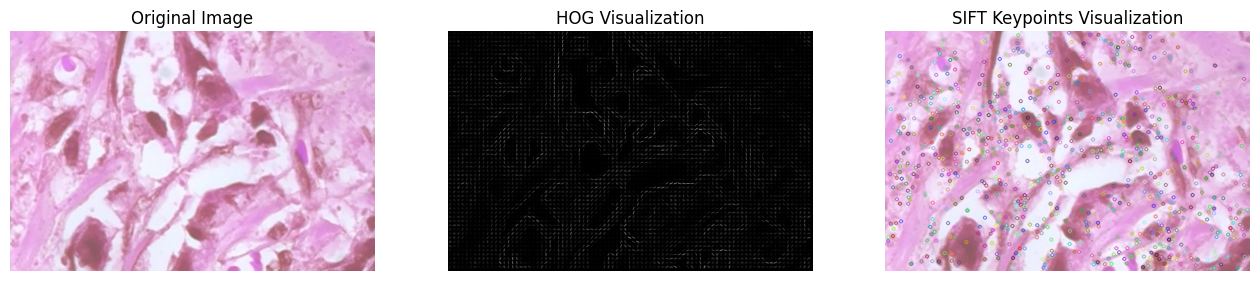

In [ ]:
from skimage.feature import hog
from skimage import io
import matplotlib.pyplot as plt

img_index = 36

# Load a grayscale image
image = io.imread(trainX[img_index], as_gray=True)
image_sift = cv2.imread(trainX[img_index])
sift = cv2.SIFT_create()
# Detect SIFT keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image_sift, None)
# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image_sift, keypoints, None,  # Output image (None means modify the original)flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,  # Draw rich keypoints including size and orientation
                                        )
# Extract HOG features and visualization
features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.figure(figsize = (16,8))
# Display the original image and the HOG visualization
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.imread(trainX[img_index]))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("HOG Visualization")
plt.imshow(hog_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
# Display the image with keypoints
plt.title("SIFT Keypoints Visualization")
plt.imshow(image_with_keypoints)
plt.axis('off')
plt.show()


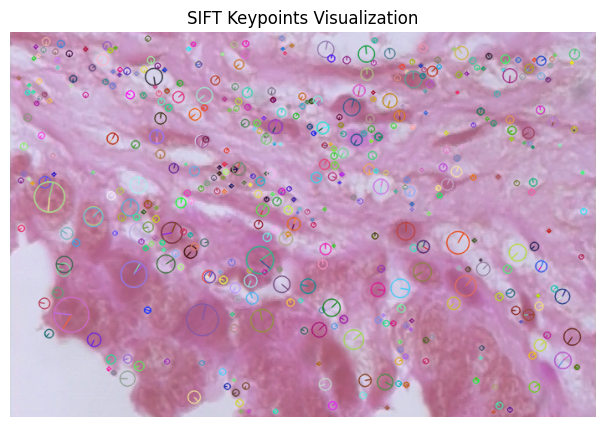

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(trainX[0])

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(
    image,
    keypoints,
    None,  # Output image (None means modify the original)
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,  # Draw rich keypoints including size and orientation
      # Color of keypoints (blue in this case)
)

# Display the image with keypoints
plt.figure(figsize=(10, 5))
plt.title("SIFT Keypoints Visualization")
plt.imshow(image_with_keypoints)
plt.axis('off')
plt.show()

In [ ]:
# Explainability: https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

# 1. SHAP
!pip install shap
import shap
import matplotlib.pyplot as plt

NameError: name 'svm_model' is not defined

In [ ]:
svm_all.predict_proba

<bound method BaseSVC.predict_proba of SVC(probability=True, random_state=42)>

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
# Use a subset of the training data as background data
background = trainX_all[:100]  # Select a manageable subset for KernelExplainer

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(svm_all.predict_proba, background)

# Explain predictions for test data
shap_values = explainer.shap_values(testX_all[:10])  # Explaining 10 samples

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test[:10], feature_names=[f"Feature {i}" for i in range(X.shape[1])])

# SHAP force plot for a single prediction
shap.force_plot(
    explainer.expected_value[1],  # Expected value for class 1
    shap_values[1][0],  # SHAP values for the first test sample (class 1)
    X_test[0],          # Feature values of the first test sample
    feature_names=[f"Feature {i}" for i in range(X.shape[1])]
)

In [ ]:
# 2. LIME
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)

In [ ]:
_